# **SONAR** <h3> *Rock* **vs** *Mine* </h3>

[![Submarine_vs_Minefield](./submarine_vs_minefield.jpg "3d illustration of a submarine passing through a minefield")](https://media.istockphoto.com/id/932625038/photo/3d-illustration-of-a-submarine-passing-through-a-minefield.jpg?s=612x612&w=0&k=20&c=WyPyf29iGu3V1_VMCVI5u0WHurX1Dxy04YCht6bXc98=)

## Objective :

In this project, we are trying to build a system to predict whether the object beneath the submarine is mine or rock.

First, let's import all the dependencies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Now, we shall read the csv data into a pandas dataframe.

In [2]:
sonar_data = pd.read_csv("sonar_data.csv", header=None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Let's try to understand our dataset better before we go into the model building stuff.

In [3]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [4]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [5]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

We saw the data doesn't contain any null values(in the *sonar_data.info()* command). Also, the classes are fairly balanced for the label column 60.(**M:** 111, **R:** 97) 
So, now we're ready to build a model to identify between a rock and a mine.
First, let's define our feature variables and our target variable.

In [6]:
X = sonar_data.drop(60, axis=1)
y = sonar_data[60]

Now, we split our dataset to train and test set.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=0)
print(f"Shape of the training data: X_train{X_train.shape} \t y_train{y_train.shape}")
print(f"Shape of the testing data: X_test{X_test.shape} \t y_train{y_test.shape}")

Shape of the training data: X_train(187, 60) 	 y_train(187,)
Shape of the testing data: X_test(21, 60) 	 y_train(21,)


Now, let's create our model object. We're using **Logistic Regression** model for this task.

In [8]:
lr = LogisticRegression(max_iter=10000)

We'll perform a Grid Search to find the optimum value for our hyperparameters. First, we'll create a params dictionary containing all the combinations of the hyperparameters from which we want grid search to find the optimum value.

In [9]:
params = [{"solver": ["lbfgs", "sag", "newton-cg", "liblinear", "saga"], "penalty": ["l2"], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
          {"solver": ["lbfgs", "sag", "newton-cg", "saga"], "penalty": ["none"]},
          {"solver": ["liblinear", "saga"], "penalty": ["l1"], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
          {"solver": ["saga"], "penalty": ["elasticnet"], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], "l1_ratio": list(np.linspace(0, 1, 101))}]

Now, we give the params dictionary as a parameter to the **GridSearchCV()** and do a 20-fold Stratified K-Fold cross validation to find the optimum value for hyperparameters for our logistic regression model. We'll also use **tqdm()** from the tqdm library to keep a track of the progress via a progress bar.

*(__Note:__ Running the following cell could take a long time, as we are  training and testing upto 15200 models in this step).*

In [10]:
Grid1 = GridSearchCV(lr, param_grid=params, cv=20, n_jobs=-1)
for param in tqdm(Grid1.param_grid):
    Grid1.set_params(param_grid=param)
    Grid1.fit(X_train, y_train)

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [44:03<00:00, 660.83s/it]


In [11]:
Grid1.best_estimator_

LogisticRegression(C=10, l1_ratio=0.96, max_iter=10000, penalty='elasticnet',
                   solver='saga')

In [12]:
Grid1.best_score_

0.7927777777777779

We can see the best values for accuracy are derived using the parameters: **C**=10, **l1_ratio**=0.96, **max_iter**=10000, **penalty**='elasticnet', **solver**='saga'. Now just for curiosity purpose, let's see the other top performing hyperparameters values.

In [13]:
results_df = pd.DataFrame(Grid1.cv_results_)
top100 = results_df.sort_values(by="rank_test_score").head(100)
top100.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,param_penalty,param_solver,params,split0_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
501,0.698576,0.113957,0.002843,0.005606,10,0.97,elasticnet,saga,"{'C': 10, 'l1_ratio': 0.97, 'penalty': 'elasti...",0.9,...,0.666667,0.777778,0.777778,0.888889,0.777778,0.888889,0.777778,0.792778,0.135504,1
500,0.617790,0.088994,0.003907,0.006766,10,0.96,elasticnet,saga,"{'C': 10, 'l1_ratio': 0.96, 'penalty': 'elasti...",0.9,...,0.666667,0.777778,0.777778,0.888889,0.777778,0.888889,0.777778,0.792778,0.135504,1
494,0.517007,0.042098,0.001763,0.004702,10,0.9,elasticnet,saga,"{'C': 10, 'l1_ratio': 0.9, 'penalty': 'elastic...",0.9,...,0.777778,0.777778,0.777778,0.888889,0.666667,0.888889,0.777778,0.792778,0.135504,3
495,0.639674,0.113321,0.005571,0.006380,10,0.91,elasticnet,saga,"{'C': 10, 'l1_ratio': 0.91, 'penalty': 'elasti...",0.9,...,0.777778,0.777778,0.777778,0.888889,0.666667,0.888889,0.777778,0.792778,0.135504,3
502,0.728843,0.128334,0.004757,0.007272,10,0.98,elasticnet,saga,"{'C': 10, 'l1_ratio': 0.98, 'penalty': 'elasti...",0.9,...,0.666667,0.777778,0.777778,0.888889,0.777778,0.888889,0.777778,0.787778,0.144098,5


Using the best hyperparameter values, let's train the model again and see how well it performs on the test data.

In [14]:
lr = Grid1.best_estimator_
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)


## Evaluation :

In [15]:
print(f"Accuracy on the test set:", accuracy_score(y_test, y_hat))

Accuracy on the test set: 0.7619047619047619


As we see our model got a score of around 76.19% on the test dataset. Now, let's create a confusion matrix to get a better sense of the performance of our model on the test data.

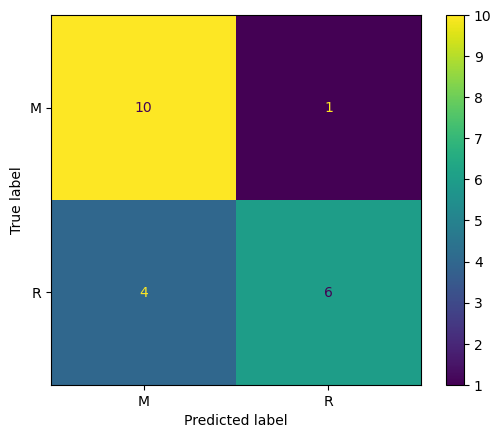

In [16]:
cm = confusion_matrix(y_test, y_hat, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

The above confusion matrix tells us that out of the 11 mines in the test data, our model successfully identified 10 of them and it wrongly predicted one of the mine as a rock. And out of the 10 rocks in the test data, our model successfully identified 6 of them and erroneously predicted 4 of the rocks as mine. Now, let's expand on this with a classification report on the performance of our model on the test data and see the score of our model for key evaluation metrics: **Precision**, **Recall** and **F1-score** for both mine and rock.

In [17]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           M       0.71      0.91      0.80        11
           R       0.86      0.60      0.71        10

    accuracy                           0.76        21
   macro avg       0.79      0.75      0.75        21
weighted avg       0.78      0.76      0.76        21



Looking at the classification report above, the first column for **Precision** tells us that when our model outputs it's prediction as a rock, it's usually correct more times than when it outputs a prediction as a mine (**6 out of 7=0.86** *vs* **10 out of 14=0.71**).

But when it's actually a mine, the **Recall** column tells us that our model does a better job at identifying it as a mine than correctly identifying a rock when it's actually a rock (**10 out of 11=0.91** *vs* **6 out of 10=0.60**).

The third column for **F1-score** is the harmonic mean of the first two columns and gives us a better sense of our model's performance by balancing both precision and recall. It tells us that overall our model is slightly better at predicting mines than rocks (**0.80** *vs* **0.71**). 

That's all from me for this project. Thank you for your time.